# Regresión Lineal Multivariable

* Modelo para predecir ventas en función de City Tier, Gender, Record, etc
* Se crean variables dummies (buen ejemplo)
* Ver al final la forma en que se enmascaran las dummies (se reducen)

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [171]:
df.describe(include='all')

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
count,2362,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362,2362,2362.000000
unique,2362,NaN,NaN,NaN,NaN,NaN,2,3,NaN
top,TXN066,NaN,NaN,NaN,NaN,NaN,Male,Tier 1,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,1200,815,NaN
mean,NaN,40.084674,7.884843,15962.884843,497.429603,4.928874,NaN,NaN,6163.176416
std,NaN,11.973412,4.283014,8046.517234,286.065147,3.084855,NaN,NaN,2799.772060
min,NaN,20.000000,1.000000,2003.000000,0.463297,0.000000,NaN,NaN,1099.815246
25%,NaN,30.000000,4.000000,9086.750000,253.443599,2.000000,NaN,NaN,3949.683101
50%,NaN,40.000000,8.000000,15764.000000,495.098046,5.000000,NaN,NaN,5602.193897
75%,NaN,51.000000,12.000000,23056.750000,745.833710,7.750000,NaN,NaN,8046.755618


**creo las variables dummies para sexo y tipo de ciudad**

In [172]:
dummy_gender = pd.get_dummies(df['Gender'], prefix="Gender")
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix="City")

In [173]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

**creo un nuevo df, agregando las features dummies**

In [174]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [175]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


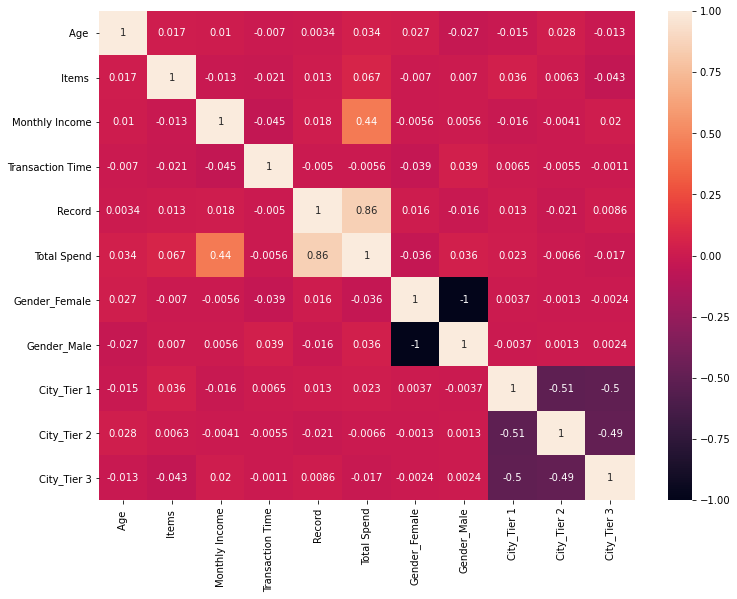

In [176]:
plt.figure(figsize=(12,9))
sns.heatmap(df_new.corr(), annot=True)

**defino las variables predictoras**

In [177]:
features_cols=['Monthly Income', "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", 
               "City_Tier 2", "City_Tier 3", "Record"]

In [178]:
x = df_new[features_cols]
y = df_new["Total Spend"]

In [179]:
lm = LinearRegression() #creo el modelo
lm.fit(x, y) #lo fiteo con las variables x e y
#creo un dataframe para almacenar los resultados estadísticos:
df_stats = pd.DataFrame()
#columna con el nombre de las features
df_stats['Features'] = features_cols
#columna con los coeficientes
df_stats['Coef'] = np.round(lm.coef_,4)
stats = f_regression(x, y) #utilizo el f_regression (from sklearn.feature_selection import f_regression)
#el el primer array de stats tengo los p-values de cada feature:
df_stats['P-valor'] = np.round(stats[1],4)
#en el segundo array de stats tengo los f-estadísticos
df_stats['F-stats'] = np.round(stats[0],4)
#imprimo la ordena al origen y el R2 del modelo (ambos sale de lm)
print("b0 = ",lm.intercept_)
print("R2 = ", lm.score(x, y))
#ordeno el dataframe y lo muestro
print(df_stats)

b0 =  -79.4171303013718
R2 =  0.9179923586131016
           Features      Coef  P-valor    F-stats
0    Monthly Income    0.1475   0.0000   562.2033
1  Transaction Time    0.1549   0.7852     0.0743
2     Gender_Female -131.0250   0.0763     3.1450
3       Gender_Male  131.0250   0.0763     3.1450
4       City_Tier 1   76.7643   0.2553     1.2946
5       City_Tier 2   55.1390   0.7470     0.1041
6       City_Tier 3 -131.9033   0.4059     0.6910
7            Record  772.2334   0.0000  6566.0728


**realizo la predicción**

In [180]:
y_pred = lm.predict(x)

In [181]:
df_new['y_pred'] = y_pred

**suma de los cuadrados de las diferencias**

In [182]:
SSD = np.sum((df_new['y_pred'] - df_new['Total Spend'])**2)
SSD

1517733985.340816

**al tamaño del dataframe (len(df_new)) le resto la cantidad de features y le resto 1**

In [183]:
RSE = np.sqrt(SSD/(len(df_new)-len(features_cols)-1))
RSE

803.1318809818165

In [184]:
spend_mean = np.mean(df_new['Total Spend'])
spend_mean

6163.176415976714

In [185]:
error = RSE/spend_mean
print("el modelo no puede explicar el {} % de las diferencias".format(np.around(error*100,4)))

el modelo no puede explicar el 13.0311 % de las diferencias


Text(0.5, 1.0, 'Distribución del SSD')

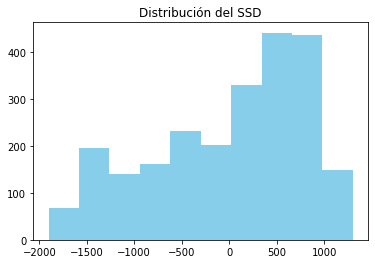

In [186]:
plt.hist((df_new['y_pred'] - df_new['Total Spend']), color='skyblue')
plt.title("Distribución del SSD")

# Enmascaramiento de variables dummies

* tomo las variables categóricas de la feature y las paso a dummie (male, female = 1, 0)
* con iloc[:, 1:] solo tomo desde la primera columna en adelante.
* con esto "enmascaro" las dummies, eliminando una columna, lo que me genera menos cantidad de features

In [187]:
dummy_gender = pd.get_dummies(df['Gender'], prefix="Gender").iloc[:, 1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


retipo la operación, pero ahora con "City Tier".
* notar que cuando queda en 0, 0 corresponde al anterior City Tier 1

In [188]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix="City").iloc[:, 1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [189]:
column_names = df.columns.values.tolist() #tomo todas las columnas del df original
df_new = df[column_names].join(dummy_gender) #le anexo las dummies del gender
column_names = df_new.columns.values.tolist() #almaceno las columnas, pero del nuevo dataframe
df_new = df_new[column_names].join(dummy_city_tier) #y se las anexo al nuevo dataframe
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [190]:
features_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
x = df_new[features_cols]
y = df_new['Total Spend']

## regresion lineal

In [193]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [194]:
#creo un dataframe para almacenar los resultados estadísticos:
df_stats = pd.DataFrame()
#columna con el nombre de las features
df_stats['Features'] = features_cols
#columna con los coeficientes
df_stats['Coef'] = np.round(lm.coef_,4)
stats = f_regression(x, y) #utilizo el f_regression (from sklearn.feature_selection import f_regression)
#el el primer array de stats tengo los p-values de cada feature:
df_stats['P-valor'] = np.round(stats[1],4)
#en el segundo array de stats tengo los f-estadísticos
df_stats['F-stats'] = np.round(stats[0],4)
#imprimo la ordena al origen y el R2 del modelo (ambos sale de lm)
print("b0 = ",lm.intercept_)
print("R2 = ", lm.score(x, y))
#ordeno el dataframe y lo muestro
print(df_stats)

b0 =  -133.67781754642238
R2 =  0.9179923586131016
           Features      Coef  P-valor    F-stats
0    Monthly Income    0.1475   0.0000   562.2033
1  Transaction Time    0.1549   0.7852     0.0743
2       Gender_Male  262.0500   0.0763     3.1450
3       City_Tier 2  -21.6254   0.7470     0.1041
4       City_Tier 3 -208.6676   0.4059     0.6910
5            Record  772.2334   0.0000  6566.0728


# Considerendo lo visto en p-values (deben ser < 0.05) y los f-stats (altos), tomo únicamente esas features para realizar la Regresión

In [199]:
x = df_new[['Monthly Income', 'Record']]
y = df_new['Total Spend']

In [200]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [201]:
lm.score(x, y)

0.9143961570004697

In [204]:
#creo un dataframe para almacenar los resultados estadísticos:
df_stats = pd.DataFrame()
#columna con el nombre de las features
df_stats['Features'] = x.columns.values.tolist()
#columna con los coeficientes
df_stats['Coef'] = np.round(lm.coef_,4)
stats = f_regression(x, y) #utilizo el f_regression (from sklearn.feature_selection import f_regression)
#el el primer array de stats tengo los p-values de cada feature:
df_stats['P-valor'] = np.round(stats[1],4)
#en el segundo array de stats tengo los f-estadísticos
df_stats['F-stats'] = np.round(stats[0],4)
#imprimo la ordena al origen y el R2 del modelo (ambos sale de lm)
print("b0 = ",lm.intercept_)
print("R2 = ", lm.score(x, y))
#ordeno el dataframe y lo muestro
print(df_stats)

b0 =  12.513451545919452
R2 =  0.9143961570004697
         Features      Coef  P-valor    F-stats
0  Monthly Income    0.1472      0.0   562.2033
1          Record  771.3165      0.0  6566.0728


In [205]:
y_pred = lm.predict(x)

In [206]:
df_new['y_pred'] = y_pred
SSD = np.sum((df_new['y_pred'] - df_new['Total Spend'])**2)
RSE = np.sqrt(SSD/(len(df_new)-len(features_cols)-1))
spend_mean = np.mean(df_new['Total Spend'])
error = RSE/spend_mean
print("el modelo no puede explicar el {} % de las diferencias".format(np.around(error*100,4)))

el modelo no puede explicar el 13.3081 % de las diferencias


In [ ]:
import statsmodels.formula.api as smf
modelo=smf.ols("'Total Spend'~'Monthly Income'+'Transaction Time'+Gender_Female+Gender_Male+'City_Tier 1'+'City_Tier 2'+'City_Tier 3'+Record", 
        data=df_new[features_cols]).fit()